In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)
import scipy.io

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
%matplotlib inline

In [3]:
raw = mne.io.read_raw_eeglab('../927/fixica.set')


Reading C:\Users\Yiki\Documents\UBC\MDS\Homework\capstone\927\fixica.fdt


<ipython-input-3-33cf0d3b7c60>:1: RuntimeWarning: Data file name in EEG.data (927 fix ica correct.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab('../927/fixica.set')


In [4]:
raw

<RawEEGLAB | fixica.fdt, 19 x 11088489 (5414.3 s), ~30 kB, data not loaded>

In [ ]:
raw.

In [4]:
raw_df = raw.to_data_frame()

In [5]:
mat = scipy.io.loadmat("../927/impact locations.mat")

In [6]:
stim_mock = mat['elecmax1']

events = ([[stim_mock[0][0], 0, 1]])
for i in range(len(stim_mock[0])-1):
    events.append([stim_mock[0][i+1], 0, 1])

events = np.array(events)

In [7]:
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7) #tmin/tmax likely have to be adjusted

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [8]:
event_dict = {'header': 1}

epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                    preload=True)

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 2049 original time points ...
0 bad epochs dropped


In [9]:
evoked = epochs['header'].average()

<Evoked | 'header' (average, N=33), -0.2998 – 0.7002 sec, baseline -0.299805 – 0 sec, 19 ch, ~334 kB>

In [27]:
from random import randint
color = []
n = 19
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [35]:
color_list ={}
for index, chan in enumerate(raw.ch_names):
    color_list[chan] = color[index]

In [36]:
col_names = raw_df.columns.tolist()[1:]

In [37]:
melt_df = raw_df.melt(id_vars='time',value_vars=col_names, var_name="channels", value_name="signal")

# Raw voltage values.

https://mne.tools/0.15/auto_tutorials/plot_visualize_raw.html#:~:text=The%20channels%20are%20color%20coded,channels%20are%20color%20coded%20gray.

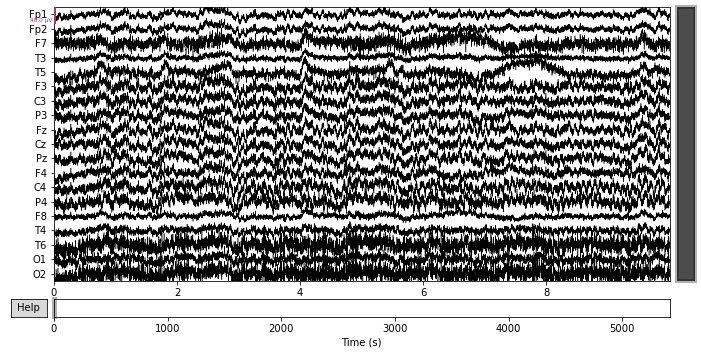

In [40]:
raw.plot();

# Power Change (Power spectral density change?)

- https://www.fieldtriptoolbox.org/workshop/oslo2019/timefrequency/
- https://plotly.com/python/v3/ipython-notebooks/mne-tutorial/#timefrequency-analysis

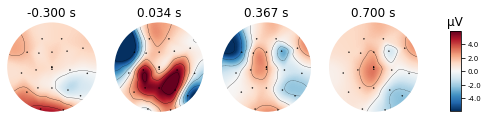

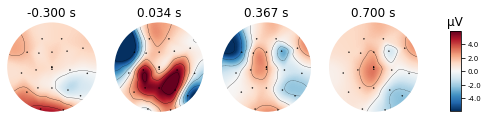

In [43]:
times = np.arange(0.05, 0.151, 0.02)
evoked.plot_topomap(ch_type='eeg', time_unit='s')

# Connectivity

- https://mne.tools/stable/auto_examples/connectivity/mixed_source_space_connectivity.html#sphx-glr-auto-examples-connectivity-mixed-source-space-connectivity-py
- https://mne.tools/stable/auto_examples/connectivity/sensor_connectivity.html#sphx-glr-auto-examples-connectivity-sensor-connectivity-py
- https://jmcarpenter2.github.io/eeg-viz/
- https://www.biorxiv.org/content/10.1101/789842v2.full.pdf

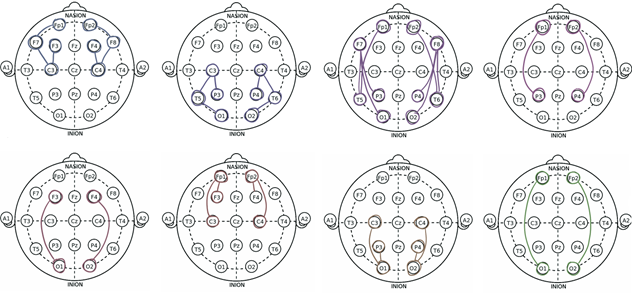

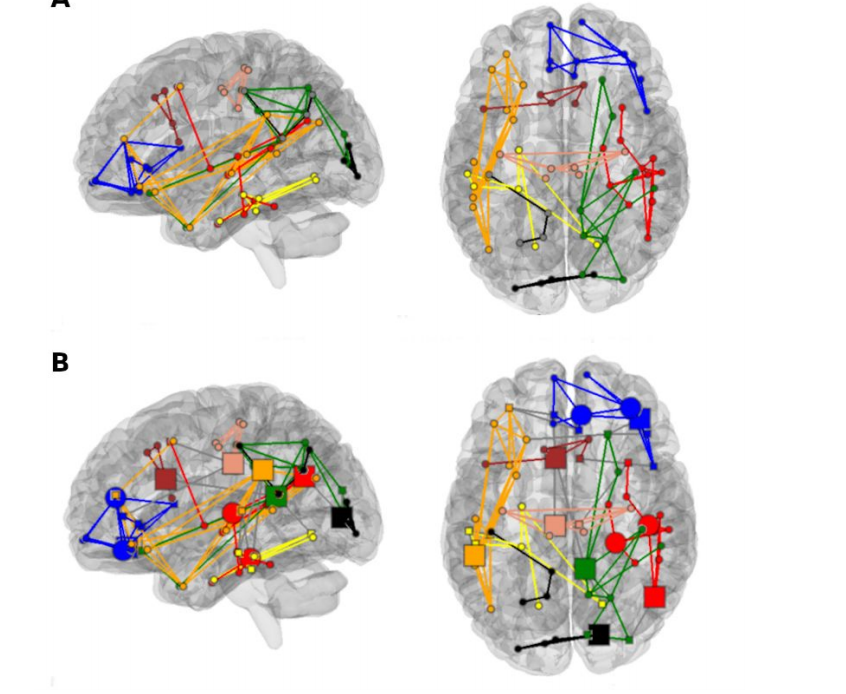

# 2D Heatmap video

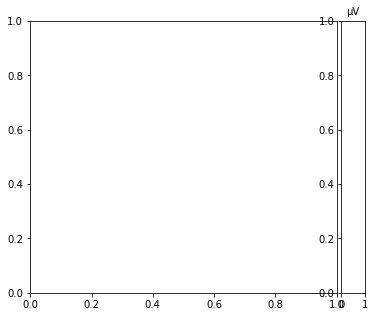

In [41]:
times = np.arange(0.05, 0.151, 0.01)
fig, anim = evoked.animate_topomap(
    times=times, ch_type='eeg', frame_rate=2, time_unit='s', blit=False);

In [42]:
from IPython.display import HTML
HTML(anim.to_jshtml())

Initializing animation...


# 3D?

- https://mne.tools/dev/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py
- https://mne.tools/dev/auto_examples/visualization/3d_to_2d.html
- https://github.com/mne-tools/mne-python/blob/main/mne/viz/_3d.py
- https://mne.tools/stable/generated/mne.viz.set_3d_view.html#mne.viz.set_3d_view